**In this study, we are going to find out the most important molecular descriptors for designing an inhibitory molecule for the PIM-1 kinase portein which is involved in different types of cancer.**

The bioactivity of the target protein (PIM-1 kinase) is obtained from the CHEMBL database. The target id on the CHEMBL platform for the mentioned protein is: ***CHEMBL2147***

First we are going to download and install the python package "**chembl_webresource_client**" which is the official client for making API calls to the CHEMBL platform

In [ ]:
!pip install chembl_webresource_client

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.2/55.2 kB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.4/61.4 kB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.5/57.5 kB 4.4 MB/s eta 0:00:00


Importing the necessary packages, retrieving bioactivity data for PIM-1 Kinase (CHEMBL2147), and storing it in a pandas dataframe.

In [ ]:
import pandas as pd
from chembl_webresource_client.new_client import new_client

In [ ]:
activity = new_client.activity

In [ ]:
res = activity.filter(target_chembl_id='CHEMBL2147').filter(standard_type="IC50")

In [ ]:
df = pd.DataFrame.from_dict(res)

In [ ]:
df.head()

,action_type,activity_comment,activity_id,activity_properties,assay_chembl_id,assay_description,assay_type,assay_variant_accession,assay_variant_mutation,bao_endpoint,...,target_organism,target_pref_name,target_tax_id,text_value,toid,type,units,uo_units,upper_value,value
0,None,None,395350,[],CHEMBL769151,Inhibition of Protein kinase PIM-1,B,None,None,BAO_0000190,...,Homo sapiens,Serine/threonine-protein kinase PIM1,9606,None,None,IC50,uM,UO_0000065,None,10.0
1,None,None,1655390,[],CHEMBL862677,Inhibitory activity against PIM1,B,None,None,BAO_0000190,...,Homo sapiens,Serine/threonine-protein kinase PIM1,9606,None,None,IC50,nM,UO_0000065,None,27.0
2,None,None,1655426,[],CHEMBL862677,Inhibitory activity against PIM1,B,None,None,BAO_0000190,...,Homo sapiens,Serine/threonine-protein kinase PIM1,9606,None,None,IC50,nM,UO_0000065,None,43.0
3,None,None,1655451,[],CHEMBL862677,Inhibitory activity against PIM1,B,None,None,BAO_0000190,...,Homo sapiens,Serine/threonine-protein kinase PIM1,9606,None,None,IC50,nM,UO_0000065,None,61.0
4,None,None,2020259,[],CHEMBL903376,Inhibition of Pim1 kinase,B,None,None,BAO_0000190,...,Homo sapiens,Serine/threonine-protein kinase PIM1,9606,None,None,IC50,uM,UO_0000065,None,0.05


Finally we will save the bioactivity data to a CSV file **bioactivity_data.csv**

In [ ]:
df.to_csv('bioactivity_data.csv', index=False)

Connecting to Google Drive to permanently save the resulting dataset or diagram files. Remember, the files created during a Google Colab session are temporary and will be deleted after the session is terminated unless you store them somewhere on the cloud, in this case on Google Drive.

In [ ]:
from google.colab import drive

In [ ]:
drive.mount('/content/gdrive', force_remount=True)

Mounted at /content/gdrive


In [ ]:
! mkdir "/content/gdrive/My Drive/Colab Notebooks/paperdata"

Taking care of missing (or nan) values

In [ ]:
df_na_standard_value_removed = df[df.standard_value.notna()]

Labeling compounds as either being active, inactive or intermediate
The bioactivity data is in the standard_value column which is in IC50 unit. Compounds having values of less than 1000 nM will be considered to be active while those greater than 10,000 nM will be considered to be inactive. The values in between 1,000 and 10,000 nM will be categorized as intermediate.

In [ ]:
bioactivity_class = []
for i in df_na_standard_value_removed.standard_value:
  if float(i) >= 1000:
    bioactivity_class.append('inactive')
  elif float(i) <= 1000:
    bioactivity_class.append('active')
  else:
    bioactivity_class.append('intermediate')

In [ ]:
mol_cid = []
for i in df_na_standard_value_removed.molecule_chembl_id:
  mol_cid.append(i)

In [ ]:
canonical_smiles = []
for i in df_na_standard_value_removed.canonical_smiles:
  canonical_smiles.append(i)

In [ ]:
standard_value = []
for i in df_na_standard_value_removed.standard_value:
  standard_value.append(i)

In [ ]:
selection = ['molecule_chembl_id', 'canonical_smiles', 'standard_value']
df3 = df_na_standard_value_removed[selection]
df3

,molecule_chembl_id,canonical_smiles,standard_value
0,CHEMBL75680,CCCCc1c(-c2ccc(O)cc2)[nH]c2nccnc12,10000.0
1,CHEMBL7463,CN(C)CCCn1cc(C2=C(c3c[nH]c4ccccc34)C(=O)NC2=O)...,27.0
2,CHEMBL50,O=c1c(O)c(-c2ccc(O)c(O)c2)oc2cc(O)cc(O)c12,43.0
3,CHEMBL200528,CC(=O)c1cccc(-c2cnc3ccc(NCC4CC4)nn23)c1,61.0
4,CHEMBL391586,N#Cc1c(-c2ccccc2)cc(-c2cc(Br)ccc2O)[nH]c1=O,50.0
...,...,...,...
3601,CHEMBL5270781,CC1CN(c2ccncc2NC(=O)c2ccnn3cc(-c4ccccc4)nc23)CCO1,380.0
3602,CHEMBL4213175,COc1ccncc1NC(=O)c1ccnc(NC(=O)C2CC2)c1,50000.0
3603,CHEMBL5270581,O=C(Nc1cnccc1-c1ccccc1)c1ccnc(NC(=O)C2CC2)c1,50000.0
3604,CHEMBL5288565,O=C(Nc1cnccc1-c1ccc(F)cc1)c1ccnc(NC(=O)C2CC2)c1,50000.0


In [ ]:
df3.reset_index(drop=True)

,molecule_chembl_id,canonical_smiles,standard_value
0,CHEMBL75680,CCCCc1c(-c2ccc(O)cc2)[nH]c2nccnc12,10000.0
1,CHEMBL7463,CN(C)CCCn1cc(C2=C(c3c[nH]c4ccccc34)C(=O)NC2=O)...,27.0
2,CHEMBL50,O=c1c(O)c(-c2ccc(O)c(O)c2)oc2cc(O)cc(O)c12,43.0
3,CHEMBL200528,CC(=O)c1cccc(-c2cnc3ccc(NCC4CC4)nn23)c1,61.0
4,CHEMBL391586,N#Cc1c(-c2ccccc2)cc(-c2cc(Br)ccc2O)[nH]c1=O,50.0
...,...,...,...
3579,CHEMBL5270781,CC1CN(c2ccncc2NC(=O)c2ccnn3cc(-c4ccccc4)nc23)CCO1,380.0
3580,CHEMBL4213175,COc1ccncc1NC(=O)c1ccnc(NC(=O)C2CC2)c1,50000.0
3581,CHEMBL5270581,O=C(Nc1cnccc1-c1ccccc1)c1ccnc(NC(=O)C2CC2)c1,50000.0
3582,CHEMBL5288565,O=C(Nc1cnccc1-c1ccc(F)cc1)c1ccnc(NC(=O)C2CC2)c1,50000.0


In [ ]:
bioactivity_class = pd.Series(bioactivity_class,name='bioactivity_class')
df4 = pd.concat([df3.reset_index(drop=True), bioactivity_class ], axis=1)

In [ ]:
df4

,molecule_chembl_id,canonical_smiles,standard_value,bioactivity_class
0,CHEMBL75680,CCCCc1c(-c2ccc(O)cc2)[nH]c2nccnc12,10000.0,inactive
1,CHEMBL7463,CN(C)CCCn1cc(C2=C(c3c[nH]c4ccccc34)C(=O)NC2=O)...,27.0,active
2,CHEMBL50,O=c1c(O)c(-c2ccc(O)c(O)c2)oc2cc(O)cc(O)c12,43.0,active
3,CHEMBL200528,CC(=O)c1cccc(-c2cnc3ccc(NCC4CC4)nn23)c1,61.0,active
4,CHEMBL391586,N#Cc1c(-c2ccccc2)cc(-c2cc(Br)ccc2O)[nH]c1=O,50.0,active
...,...,...,...,...
3579,CHEMBL5270781,CC1CN(c2ccncc2NC(=O)c2ccnn3cc(-c4ccccc4)nc23)CCO1,380.0,active
3580,CHEMBL4213175,COc1ccncc1NC(=O)c1ccnc(NC(=O)C2CC2)c1,50000.0,inactive
3581,CHEMBL5270581,O=C(Nc1cnccc1-c1ccccc1)c1ccnc(NC(=O)C2CC2)c1,50000.0,inactive
3582,CHEMBL5288565,O=C(Nc1cnccc1-c1ccc(F)cc1)c1ccnc(NC(=O)C2CC2)c1,50000.0,inactive


In [ ]:
df3.to_csv('bioactivity_preprocessed_data.csv', index=False)

In [ ]:
! wget https://repo.anaconda.com/miniconda/Miniconda3-py37_4.8.2-Linux-x86_64.sh
! chmod +x Miniconda3-py37_4.8.2-Linux-x86_64.sh
! bash ./Miniconda3-py37_4.8.2-Linux-x86_64.sh -b -f -p /usr/local
! conda install -c rdkit rdkit -y
import sys
sys.path.append('/usr/local/lib/python3.7/site-packages/')

--2024-08-19 13:28:26--  https://repo.anaconda.com/miniconda/Miniconda3-py37_4.8.2-Linux-x86_64.sh
Resolving repo.anaconda.com (repo.anaconda.com)... 104.16.32.241, 104.16.191.158, 2606:4700::6810:20f1, ...
Connecting to repo.anaconda.com (repo.anaconda.com)|104.16.32.241|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 85055499 (81M) [application/x-sh]
Saving to: ‘Miniconda3-py37_4.8.2-Linux-x86_64.sh’

Miniconda3-py37_4.8 100%[===================>]  81.12M   135MB/s    in 0.6s    

2024-08-19 13:28:27 (135 MB/s) - ‘Miniconda3-py37_4.8.2-Linux-x86_64.sh’ saved [85055499/85055499]

PREFIX=/usr/local
Unpacking payload ...
Solving environment: | / done

## Package Plan ##

  environment location: /usr/local

  added / updated specs:
    - _libgcc_mutex==0.1=main
    - asn1crypto==1.3.0=py37_0
    - ca-certificates==2020.1.1=0
    - certifi==2019.11.28=py37_0
    - cffi==1.14.0=py37h2e261b9_0
    - chardet==3.0.4=py37_1003
    - conda-package-handling==1.6.0=p

In [ ]:
!pip install rdkit-pypi

     |████████████████████████████████| 29.2 MB 1.4 MB/s 


In [ ]:
import numpy as np
from rdkit import Chem
from rdkit.Chem import Descriptors, Lipinski

In [ ]:
def lipinski(smiles, verbose=False):

    moldata= []
    for elem in smiles:
        mol=Chem.MolFromSmiles(elem)
        moldata.append(mol)

    baseData= np.arange(1,1)
    i=0
    for mol in moldata:

        desc_MolWt = Descriptors.MolWt(mol)
        desc_MolLogP = Descriptors.MolLogP(mol)
        desc_NumHDonors = Lipinski.NumHDonors(mol)
        desc_NumHAcceptors = Lipinski.NumHAcceptors(mol)

        row = np.array([desc_MolWt,
                        desc_MolLogP,
                        desc_NumHDonors,
                        desc_NumHAcceptors])

        if(i==0):
            baseData=row
        else:
            baseData=np.vstack([baseData, row])
        i=i+1

    columnNames=["MW","LogP","NumHDonors","NumHAcceptors"]
    descriptors = pd.DataFrame(data=baseData,columns=columnNames)

    return descriptors

In [ ]:
df_lipinski = lipinski(df4.canonical_smiles)

In [ ]:
df_lipinski

,MW,LogP,NumHDonors,NumHAcceptors
0,267.332,3.67310,2.0,3.0
1,412.493,3.64150,2.0,4.0
2,302.238,1.98800,5.0,7.0
3,306.369,3.42080,1.0,5.0
4,367.202,4.04868,2.0,3.0
...,...,...,...,...
3579,414.469,3.26870,1.0,7.0
3580,312.329,2.08600,2.0,5.0
3581,358.401,3.74440,2.0,4.0
3582,376.391,3.88350,2.0,4.0


In [ ]:
df_combined = pd.concat([df4.reset_index(drop=True),df_lipinski.reset_index(drop=True)], axis=1)

In [55]:
df_combined

,molecule_chembl_id,canonical_smiles,standard_value,bioactivity_class,MW,LogP,NumHDonors,NumHAcceptors,standard_value_norm
0,CHEMBL75680,CCCCc1c(-c2ccc(O)cc2)[nH]c2nccnc12,10000.0,inactive,267.332,3.67310,2.0,3.0,10000.0
1,CHEMBL7463,CN(C)CCCn1cc(C2=C(c3c[nH]c4ccccc34)C(=O)NC2=O)...,27.0,active,412.493,3.64150,2.0,4.0,27.0
2,CHEMBL50,O=c1c(O)c(-c2ccc(O)c(O)c2)oc2cc(O)cc(O)c12,43.0,active,302.238,1.98800,5.0,7.0,43.0
3,CHEMBL200528,CC(=O)c1cccc(-c2cnc3ccc(NCC4CC4)nn23)c1,61.0,active,306.369,3.42080,1.0,5.0,61.0
4,CHEMBL391586,N#Cc1c(-c2ccccc2)cc(-c2cc(Br)ccc2O)[nH]c1=O,50.0,active,367.202,4.04868,2.0,3.0,50.0
...,...,...,...,...,...,...,...,...,...
3579,CHEMBL5270781,CC1CN(c2ccncc2NC(=O)c2ccnn3cc(-c4ccccc4)nc23)CCO1,380.0,active,414.469,3.26870,1.0,7.0,380.0
3580,CHEMBL4213175,COc1ccncc1NC(=O)c1ccnc(NC(=O)C2CC2)c1,50000.0,inactive,312.329,2.08600,2.0,5.0,50000.0
3581,CHEMBL5270581,O=C(Nc1cnccc1-c1ccccc1)c1ccnc(NC(=O)C2CC2)c1,50000.0,inactive,358.401,3.74440,2.0,4.0,50000.0
3582,CHEMBL5288565,O=C(Nc1cnccc1-c1ccc(F)cc1)c1ccnc(NC(=O)C2CC2)c1,50000.0,inactive,376.391,3.88350,2.0,4.0,50000.0


In [56]:
print(df_combined.dtypes)

molecule_chembl_id      object
canonical_smiles        object
standard_value         float64
bioactivity_class       object
MW                     float64
LogP                   float64
NumHDonors             float64
NumHAcceptors          float64
standard_value_norm    float64
dtype: object


In [57]:
df_combined['standard_value'] = df_combined['standard_value'].astype(float)

In [58]:
print(df_combined.dtypes)

molecule_chembl_id      object
canonical_smiles        object
standard_value         float64
bioactivity_class       object
MW                     float64
LogP                   float64
NumHDonors             float64
NumHAcceptors          float64
standard_value_norm    float64
dtype: object


In [59]:
# normalizing standard_value column
def norm_value(input):
    norm = []

    for i in input['standard_value']:
        if i > 100000000:
          i = 100000000
        norm.append(i)

    input['standard_value_norm'] = norm
    x = input.drop('standard_value', axis=1)

    return x


In [60]:
df_norm = norm_value(df_combined)

In [61]:
df_norm.standard_value_norm.describe()

,standard_value_norm
count,3.584000e+03
mean,3.393966e+04
std,1.315534e+06
min,6.000000e-03
25%,3.000000e+00
50%,2.610000e+01
75%,4.722500e+02
max,5.651100e+07


In [64]:
def pIC50(input):
    pIC50 = []

    for i in input['standard_value_norm']:
        molar = i*(10**-9) # Converts nM to M
        pIC50.append(-np.log10(molar))

    input['pIC50'] = pIC50
    x = input.drop('standard_value_norm', axis=1)

    return x

In [66]:
df_final = pIC50(df_norm)

In [67]:
df_final

,molecule_chembl_id,canonical_smiles,bioactivity_class,MW,LogP,NumHDonors,NumHAcceptors,pIC50
0,CHEMBL75680,CCCCc1c(-c2ccc(O)cc2)[nH]c2nccnc12,inactive,267.332,3.67310,2.0,3.0,5.000000
1,CHEMBL7463,CN(C)CCCn1cc(C2=C(c3c[nH]c4ccccc34)C(=O)NC2=O)...,active,412.493,3.64150,2.0,4.0,7.568636
2,CHEMBL50,O=c1c(O)c(-c2ccc(O)c(O)c2)oc2cc(O)cc(O)c12,active,302.238,1.98800,5.0,7.0,7.366532
3,CHEMBL200528,CC(=O)c1cccc(-c2cnc3ccc(NCC4CC4)nn23)c1,active,306.369,3.42080,1.0,5.0,7.214670
4,CHEMBL391586,N#Cc1c(-c2ccccc2)cc(-c2cc(Br)ccc2O)[nH]c1=O,active,367.202,4.04868,2.0,3.0,7.301030
...,...,...,...,...,...,...,...,...
3579,CHEMBL5270781,CC1CN(c2ccncc2NC(=O)c2ccnn3cc(-c4ccccc4)nc23)CCO1,active,414.469,3.26870,1.0,7.0,6.420216
3580,CHEMBL4213175,COc1ccncc1NC(=O)c1ccnc(NC(=O)C2CC2)c1,inactive,312.329,2.08600,2.0,5.0,4.301030
3581,CHEMBL5270581,O=C(Nc1cnccc1-c1ccccc1)c1ccnc(NC(=O)C2CC2)c1,inactive,358.401,3.74440,2.0,4.0,4.301030
3582,CHEMBL5288565,O=C(Nc1cnccc1-c1ccc(F)cc1)c1ccnc(NC(=O)C2CC2)c1,inactive,376.391,3.88350,2.0,4.0,4.301030


In [68]:
df_final.pIC50.describe()

,pIC50
count,3584.000000
mean,7.437481
std,1.515210
min,1.247867
25%,6.325843
50%,7.583363
75%,8.522879
max,11.221849


In [69]:
count = df_final[df_final['bioactivity_class'] == 'intermediate'].shape[0]
count

0

In [70]:
df_2class = df_final[df_final.bioactivity_class != 'intermediate']

In [71]:
df_2class

,molecule_chembl_id,canonical_smiles,bioactivity_class,MW,LogP,NumHDonors,NumHAcceptors,pIC50
0,CHEMBL75680,CCCCc1c(-c2ccc(O)cc2)[nH]c2nccnc12,inactive,267.332,3.67310,2.0,3.0,5.000000
1,CHEMBL7463,CN(C)CCCn1cc(C2=C(c3c[nH]c4ccccc34)C(=O)NC2=O)...,active,412.493,3.64150,2.0,4.0,7.568636
2,CHEMBL50,O=c1c(O)c(-c2ccc(O)c(O)c2)oc2cc(O)cc(O)c12,active,302.238,1.98800,5.0,7.0,7.366532
3,CHEMBL200528,CC(=O)c1cccc(-c2cnc3ccc(NCC4CC4)nn23)c1,active,306.369,3.42080,1.0,5.0,7.214670
4,CHEMBL391586,N#Cc1c(-c2ccccc2)cc(-c2cc(Br)ccc2O)[nH]c1=O,active,367.202,4.04868,2.0,3.0,7.301030
...,...,...,...,...,...,...,...,...
3579,CHEMBL5270781,CC1CN(c2ccncc2NC(=O)c2ccnn3cc(-c4ccccc4)nc23)CCO1,active,414.469,3.26870,1.0,7.0,6.420216
3580,CHEMBL4213175,COc1ccncc1NC(=O)c1ccnc(NC(=O)C2CC2)c1,inactive,312.329,2.08600,2.0,5.0,4.301030
3581,CHEMBL5270581,O=C(Nc1cnccc1-c1ccccc1)c1ccnc(NC(=O)C2CC2)c1,inactive,358.401,3.74440,2.0,4.0,4.301030
3582,CHEMBL5288565,O=C(Nc1cnccc1-c1ccc(F)cc1)c1ccnc(NC(=O)C2CC2)c1,inactive,376.391,3.88350,2.0,4.0,4.301030


In [72]:
import seaborn as sns
sns.set(style='ticks')
import matplotlib.pyplot as plt

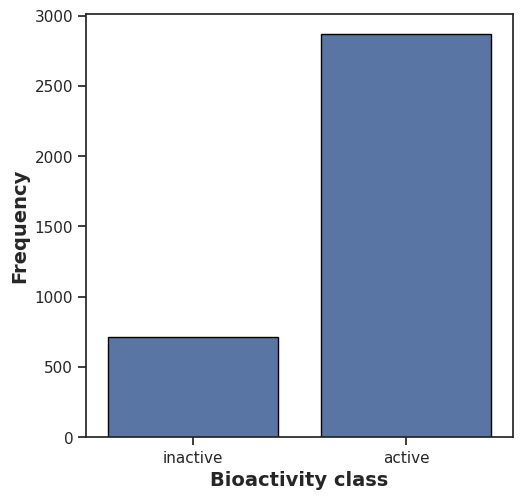

In [73]:
#frequenct plot of the two bioactivity classes
plt.figure(figsize=(5.5, 5.5))

sns.countplot(x='bioactivity_class', data=df_2class, edgecolor='black')

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('Frequency', fontsize=14, fontweight='bold')

plt.savefig('plot_bioactivity_class.pdf')

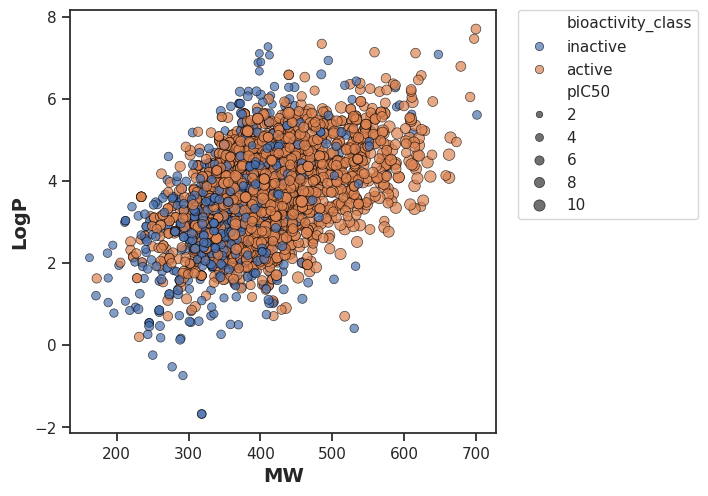

In [74]:
plt.figure(figsize=(5.5, 5.5))

sns.scatterplot(x='MW', y='LogP', data=df_2class, hue='bioactivity_class', size='pIC50', edgecolor='black', alpha=0.7)

plt.xlabel('MW', fontsize=14, fontweight='bold')
plt.ylabel('LogP', fontsize=14, fontweight='bold')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0)
plt.savefig('plot_MW_vs_LogP.pdf')


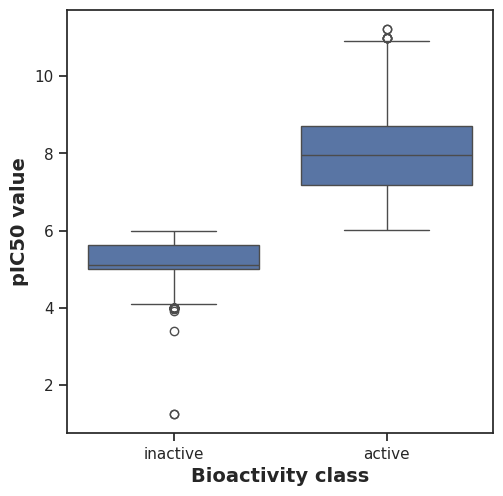

In [75]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'bioactivity_class', y = 'pIC50', data = df_2class)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('pIC50 value', fontsize=14, fontweight='bold')

plt.savefig('plot_ic50.pdf')

In [76]:
#Testing whether there is a significant statistical difference between the two active and inactive classes
def mannwhitney(descriptor, verbose=False):
  # https://machinelearningmastery.com/nonparametric-statistical-significance-tests-in-python/
  from numpy.random import seed
  from numpy.random import randn
  from scipy.stats import mannwhitneyu

# seed the random number generator
  seed(1)

# actives and inactives
  selection = [descriptor, 'bioactivity_class']
  df = df_2class[selection]
  active = df[df.bioactivity_class == 'active']
  active = active[descriptor]

  selection = [descriptor, 'bioactivity_class']
  df = df_2class[selection]
  inactive = df[df.bioactivity_class == 'inactive']
  inactive = inactive[descriptor]

# compare samples
  stat, p = mannwhitneyu(active, inactive)
  #print('Statistics=%.3f, p=%.3f' % (stat, p))

# interpret
  alpha = 0.05
  if p > alpha:
    interpretation = 'Same distribution (fail to reject H0)'
  else:
    interpretation = 'Different distribution (reject H0)'

  results = pd.DataFrame({'Descriptor':descriptor,
                          'Statistics':stat,
                          'p':p,
                          'alpha':alpha,
                          'Interpretation':interpretation}, index=[0])
  filename = 'mannwhitneyu_' + descriptor + '.csv'
  results.to_csv(filename)

  return results

In [77]:
mannwhitney('pIC50')

,Descriptor,Statistics,p,alpha,Interpretation
0,pIC50,2051335.0,0.0,0.05,Different distribution (reject H0)


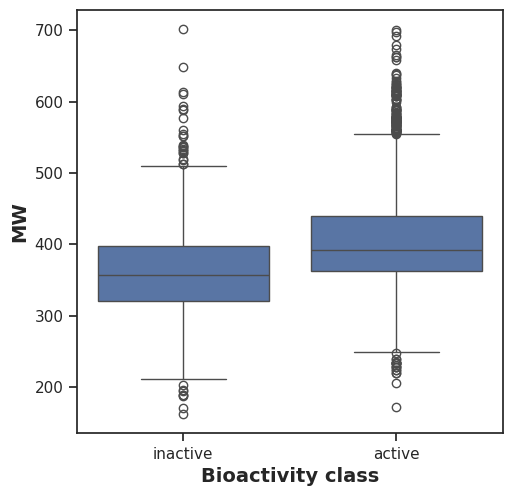

In [78]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'bioactivity_class', y = 'MW', data = df_2class)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('MW', fontsize=14, fontweight='bold')

plt.savefig('plot_MW.pdf')

In [79]:
mannwhitney('MW')

,Descriptor,Statistics,p,alpha,Interpretation
0,MW,1413248.0,3.008628e-55,0.05,Different distribution (reject H0)


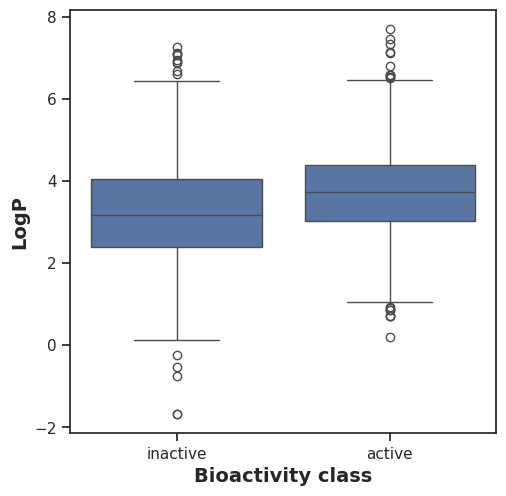

In [80]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'bioactivity_class', y = 'LogP', data = df_2class)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('LogP', fontsize=14, fontweight='bold')

plt.savefig('plot_LogP.pdf')

In [81]:
mannwhitney('LogP')

,Descriptor,Statistics,p,alpha,Interpretation
0,LogP,1279091.5,1.353011e-24,0.05,Different distribution (reject H0)


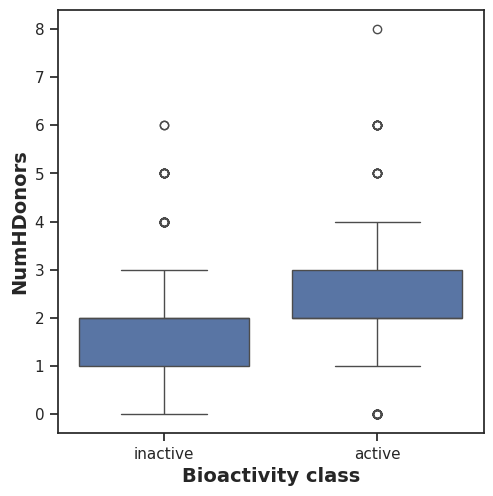

In [82]:

plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'bioactivity_class', y = 'NumHDonors', data = df_2class)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('NumHDonors', fontsize=14, fontweight='bold')

plt.savefig('plot_NumHDonors.pdf')

In [83]:
mannwhitney('NumHDonors')

,Descriptor,Statistics,p,alpha,Interpretation
0,NumHDonors,1354114.0,1.961942e-45,0.05,Different distribution (reject H0)


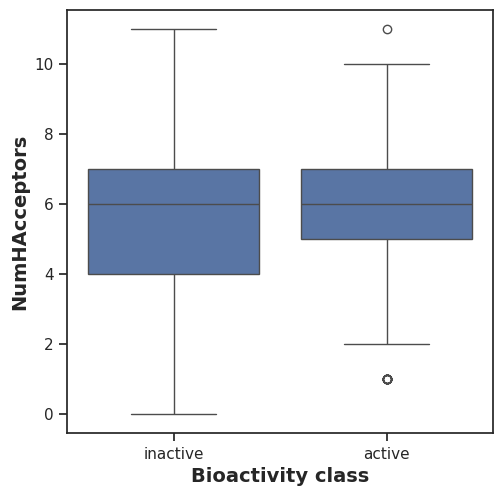

In [84]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'bioactivity_class', y = 'NumHAcceptors', data = df_2class)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('NumHAcceptors', fontsize=14, fontweight='bold')

plt.savefig('plot_NumHAcceptors.pdf')

In [85]:
mannwhitney('NumHAcceptors')

,Descriptor,Statistics,p,alpha,Interpretation
0,NumHAcceptors,1031410.0,0.813333,0.05,Same distribution (fail to reject H0)


In [86]:
! zip -r results.zip . -i *.csv *.pdf

	zip warning: name not matched: gdrive
  adding: mannwhitneyu_MW.csv (deflated 9%)
  adding: plot_ic50.pdf (deflated 38%)
  adding: plot_NumHDonors.pdf (deflated 37%)
  adding: plot_LogP.pdf (deflated 38%)
  adding: plot_NumHAcceptors.pdf (deflated 37%)
  adding: mannwhitneyu_LogP.csv (deflated 10%)
  adding: bioactivity_data.csv (deflated 95%)
  adding: plot_MW.pdf (deflated 36%)
  adding: mannwhitneyu_pIC50.csv (deflated 9%)
  adding: bioactivity_preprocessed_data.csv (deflated 82%)
  adding: plot_MW_vs_LogP.pdf (deflated 2%)
  adding: mannwhitneyu_NumHDonors.csv (deflated 11%)
  adding: mannwhitneyu_NumHAcceptors.csv (deflated 11%)
  adding: plot_bioactivity_class.pdf (deflated 38%)


In [88]:
# downloading padel descriptors for calculating descriptors
# and fingerprints for each molecule in our current dataset
! wget https://github.com/dataprofessor/bioinformatics/raw/master/padel.zip
! wget https://github.com/dataprofessor/bioinformatics/raw/master/padel.sh

--2024-08-19 15:38:02--  https://github.com/dataprofessor/bioinformatics/raw/master/padel.zip
Resolving github.com (github.com)... 140.82.113.3
Connecting to github.com (github.com)|140.82.113.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/dataprofessor/bioinformatics/master/padel.zip [following]
--2024-08-19 15:38:02--  https://raw.githubusercontent.com/dataprofessor/bioinformatics/master/padel.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 25768637 (25M) [application/zip]
Saving to: ‘padel.zip’

padel.zip           100%[===================>]  24.57M  --.-KB/s    in 0.07s   

2024-08-19 15:38:02 (345 MB/s) - ‘padel.zip’ saved [25768637/25768637]

--2024-08-19 15:38:02--  https://github

In [89]:
! unzip padel.zip

Archive:  padel.zip
   creating: PaDEL-Descriptor/
  inflating: __MACOSX/._PaDEL-Descriptor  
  inflating: PaDEL-Descriptor/MACCSFingerprinter.xml  
  inflating: __MACOSX/PaDEL-Descriptor/._MACCSFingerprinter.xml  
  inflating: PaDEL-Descriptor/AtomPairs2DFingerprinter.xml  
  inflating: __MACOSX/PaDEL-Descriptor/._AtomPairs2DFingerprinter.xml  
  inflating: PaDEL-Descriptor/EStateFingerprinter.xml  
  inflating: __MACOSX/PaDEL-Descriptor/._EStateFingerprinter.xml  
  inflating: PaDEL-Descriptor/Fingerprinter.xml  
  inflating: __MACOSX/PaDEL-Descriptor/._Fingerprinter.xml  
  inflating: PaDEL-Descriptor/.DS_Store  
  inflating: __MACOSX/PaDEL-Descriptor/._.DS_Store  
   creating: PaDEL-Descriptor/license/
  inflating: __MACOSX/PaDEL-Descriptor/._license  
  inflating: PaDEL-Descriptor/KlekotaRothFingerprintCount.xml  
  inflating: __MACOSX/PaDEL-Descriptor/._KlekotaRothFingerprintCount.xml  
  inflating: PaDEL-Descriptor/config  
  inflating: __MACOSX/PaDEL-Descriptor/._config  
  inf

In [90]:
selection = ['canonical_smiles','molecule_chembl_id']
df_final_selection = df_final[selection]
df_final_selection.to_csv('molecule.smi', sep='\t', index=False, header=False)

In [91]:
df_final_selection

,canonical_smiles,molecule_chembl_id
0,CCCCc1c(-c2ccc(O)cc2)[nH]c2nccnc12,CHEMBL75680
1,CN(C)CCCn1cc(C2=C(c3c[nH]c4ccccc34)C(=O)NC2=O)...,CHEMBL7463
2,O=c1c(O)c(-c2ccc(O)c(O)c2)oc2cc(O)cc(O)c12,CHEMBL50
3,CC(=O)c1cccc(-c2cnc3ccc(NCC4CC4)nn23)c1,CHEMBL200528
4,N#Cc1c(-c2ccccc2)cc(-c2cc(Br)ccc2O)[nH]c1=O,CHEMBL391586
...,...,...
3579,CC1CN(c2ccncc2NC(=O)c2ccnn3cc(-c4ccccc4)nc23)CCO1,CHEMBL5270781
3580,COc1ccncc1NC(=O)c1ccnc(NC(=O)C2CC2)c1,CHEMBL4213175
3581,O=C(Nc1cnccc1-c1ccccc1)c1ccnc(NC(=O)C2CC2)c1,CHEMBL5270581
3582,O=C(Nc1cnccc1-c1ccc(F)cc1)c1ccnc(NC(=O)C2CC2)c1,CHEMBL5288565


In [92]:
! cat padel.sh

java -Xms1G -Xmx1G -Djava.awt.headless=true -jar ./PaDEL-Descriptor/PaDEL-Descriptor.jar -removesalt -standardizenitro -fingerprints -descriptortypes ./PaDEL-Descriptor/PubchemFingerprinter.xml -dir ./ -file descriptors_output.csv


In [93]:
! bash padel.sh

Processing CHEMBL7463 in molecule.smi (2/3584). 
Processing CHEMBL75680 in molecule.smi (1/3584). 
Processing CHEMBL200528 in molecule.smi (4/3584). Average speed: 5.76 s/mol.
Processing CHEMBL50 in molecule.smi (3/3584). Average speed: 10.83 s/mol.
Processing CHEMBL391586 in molecule.smi (5/3584). Average speed: 4.05 s/mol.
Processing CHEMBL247077 in molecule.smi (6/3584). Average speed: 3.17 s/mol.
Processing CHEMBL391154 in molecule.smi (7/3584). Average speed: 2.72 s/mol.
Processing CHEMBL247684 in molecule.smi (8/3584). Average speed: 2.33 s/mol.
Processing CHEMBL247681 in molecule.smi (10/3584). Average speed: 1.87 s/mol.
Processing CHEMBL247682 in molecule.smi (9/3584). Average speed: 2.13 s/mol.
Processing CHEMBL427876 in molecule.smi (11/3584). Average speed: 1.96 s/mol.
Processing CHEMBL246657 in molecule.smi (13/3584). Average speed: 1.49 s/mol.
Processing CHEMBL395464 in molecule.smi (12/3584). Average speed: 1.58 s/mol.
Processing CHEMBL246656 in molecule.smi (14/3584). Av

In [94]:
df_final_X = pd.read_csv('descriptors_output.csv')

In [95]:
df_final_X

,Name,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,...,PubchemFP871,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880
0,CHEMBL75680,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,CHEMBL7463,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,CHEMBL50,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,CHEMBL200528,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,CHEMBL391586,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3579,CHEMBL4213175,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3580,CHEMBL5270781,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3581,CHEMBL5270581,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3582,CHEMBL5288565,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [96]:
df_final_X = df_final_X.drop(columns=['Name'])
df_final_X

,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,PubchemFP9,...,PubchemFP871,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880
0,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3579,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3580,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3581,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3582,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [97]:
df_final_Y = df_final['pIC50']
df_final_Y

,pIC50
0,5.000000
1,7.568636
2,7.366532
3,7.214670
4,7.301030
...,...
3579,6.420216
3580,4.301030
3581,4.301030
3582,4.301030


In [98]:
dataset = pd.concat([df_final_X,df_final_Y], axis=1)
dataset

,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,PubchemFP9,...,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880,pIC50
0,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,5.000000
1,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,7.568636
2,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,7.366532
3,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,7.214670
4,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,7.301030
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3579,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,6.420216
3580,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,4.301030
3581,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,4.301030
3582,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,4.301030


In [99]:
dataset.to_csv('PIM_bioactivity_data_2class_pIC50_pubchem_fp.csv', index=False)

In [100]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

In [ ]:
# building ml model based on the previously prepared data

In [147]:
df = pd.read_csv('PIM_bioactivity_data_2class_pIC50_pubchem_fp.csv')

In [148]:
# input features
X = df.drop('pIC50', axis=1)

In [149]:
# output features
Y = df.pIC50

In [150]:
# removing low variance features
from sklearn.feature_selection import VarianceThreshold
selection = VarianceThreshold(threshold=(.8 * (1 - .8)))
X = selection.fit_transform(X)

In [151]:
# splitting the dataset with 80/20 ratio
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

In [152]:
# building a regression model with random forest
np.random.seed(100);
model = RandomForestRegressor(n_estimators=100)
model.fit(X_train, Y_train)
r2 = model.score(X_test, Y_test)
r2

0.7398188149348606

In [153]:
Y_pred = model.predict(X_test)

<function matplotlib.pyplot.show(close=None, block=None)>

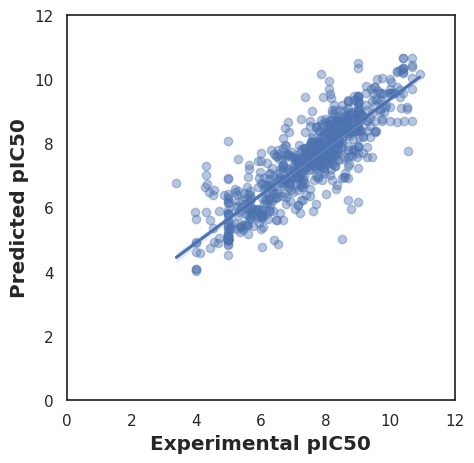

In [157]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(color_codes=True)
sns.set_style("white")

ax = sns.regplot(x=Y_test, y=Y_pred, scatter_kws={'alpha':0.4})
ax.set_xlabel('Experimental pIC50', fontsize='large', fontweight='bold')
ax.set_ylabel('Predicted pIC50', fontsize='large', fontweight='bold')
ax.set_xlim(0, 12)
ax.set_ylim(0, 12)
ax.figure.set_size_inches(5, 5)
plt.show

In [158]:
# Get feature importances
importances = model.feature_importances_

# Create a DataFrame for feature importances
feature_names = [f'Feature {i}' for i in range(X_train.shape[1])]
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})

# Sort the DataFrame by importance
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Get the top 20 features
top_20_features = importance_df.head(20)

# Display the top 20 features
print("Top 20 Features:")
print(top_20_features)

Top 20 Features:
         Feature  Importance
70    Feature 70    0.192390
25    Feature 25    0.086881
20    Feature 20    0.044289
6      Feature 6    0.033143
21    Feature 21    0.021203
104  Feature 104    0.020582
137  Feature 137    0.020488
125  Feature 125    0.015222
138  Feature 138    0.013902
120  Feature 120    0.012632
108  Feature 108    0.011719
8      Feature 8    0.011530
102  Feature 102    0.011507
11    Feature 11    0.011354
29    Feature 29    0.011283
112  Feature 112    0.011041
38    Feature 38    0.010929
0      Feature 0    0.010488
2      Feature 2    0.010116
88    Feature 88    0.009851


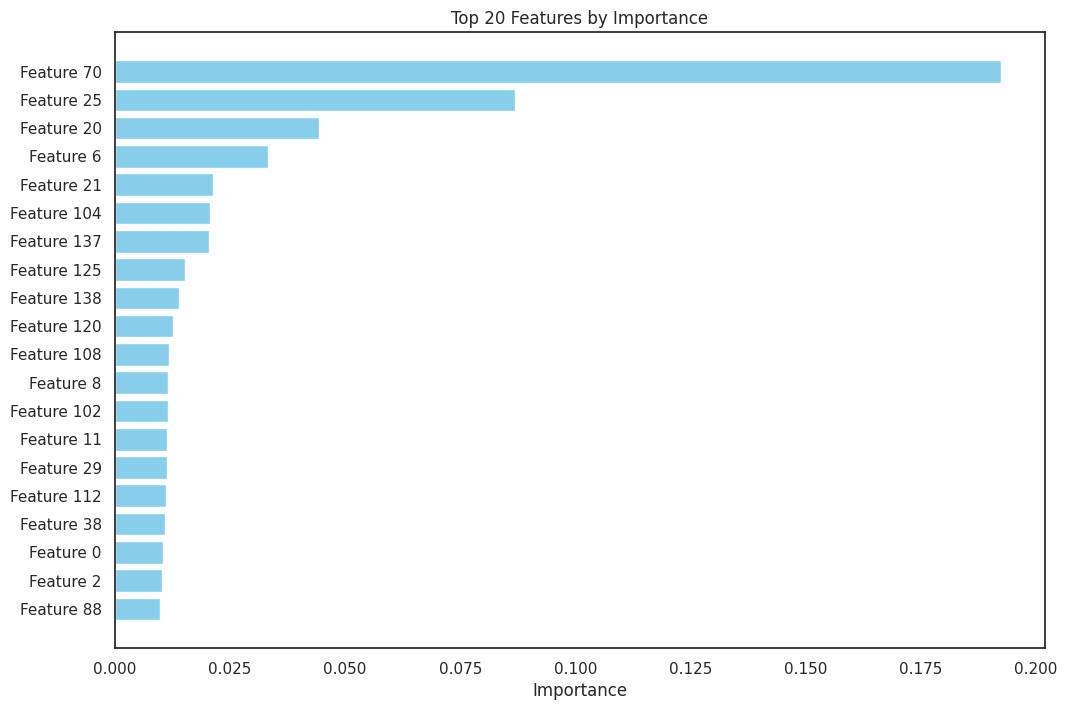

In [159]:
# Plotting the top 20 features
plt.figure(figsize=(12, 8))
plt.barh(top_20_features['Feature'], top_20_features['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.title('Top 20 Features by Importance')
plt.gca().invert_yaxis()  # Invert y-axis to have the highest importance on top
plt.show()